**Brain Tumor Detection Project**

In [1]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/data")

Skipping, found downloaded files in ".\brain-mri-images-for-brain-tumor-detection" (use force=True to force download)


Load in the dataset for negative and positive values

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 

no_tumor = os.listdir('C:/Users/Sande/OneDrive/Desktop/CS_Projects/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no')
yes_tumor = os.listdir('C:/Users/Sande/OneDrive/Desktop/CS_Projects/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes')
print(no_tumor)
print(yes_tumor)



['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg', '14 no.jpg', '15 no.jpg', '17 no.jpg', '18 no.jpg', '19 no.jpg', '2 no.jpeg', '20 no.jpg', '21 no.jpg', '22 no.jpg', '23 no.jpg', '24 no.jpg', '25 no.jpg', '26 no.jpg', '27 no.jpg', '28 no.jpg', '29 no.jpg', '3 no.jpg', '30 no.jpg', '31 no.jpg', '32 no.jpg', '33 no.jpg', '34 no.jpg', '35 no.jpg', '36 no.jpg', '37 no.jpg', '38 no.jpg', '39 no.jpg', '4 no.jpg', '40 no.jpg', '41 no.jpg', '42 no.jpg', '43 no.jpg', '44no.jpg', '45 no.jpg', '46 no.jpg', '47 no.jpg', '48 no.jpeg', '49 no.jpg', '5 no.jpg', '50 no.jpg', '6 no.jpg', '7 no.jpg', '8 no.jpg', '9 no.jpg', 'N1.JPG', 'N11.jpg', 'N15.jpg', 'N16.jpg', 'N17.jpg', 'N19.JPG', 'N2.JPG', 'N20.JPG', 'N21.jpg', 'N22.JPG', 'N26.JPG', 'N3.jpg', 'N5.jpg', 'N6.jpg', 'no 1.jpg', 'no 10.jpg', 'no 100.jpg', 'no 2.jpg', 'no 3.jpg', 'no 4.jpg', 'no 5.jpeg', 'no 6.jpg', 'no 7.jpeg', 'no 8.jpg', 'no 89.jpg', 'no 9.png', 'no 90.jpg', 'no 91.jpeg', 'no 92.jpg', 'no 923.jpg', 'no 94.jpg', 'no

In [4]:
print('Number of images w/o tumor: ', len(no_tumor))
print('Number of images w/ tumor: ', len(yes_tumor))

Number of images w/o tumor:  98
Number of images w/ tumor:  155


Data Labeling

- 0 -> negative
- 1 -> positive

In [3]:
tumor_labels = [1]*98
without_tumor_labels = [0]*155

print('negative:', len(tumor_labels))
print('positive', len(without_tumor_labels))

total_labels = without_tumor_labels + tumor_labels
print('total:', len(total_labels))
print(total_labels)

negative: 98
positive 155
total: 253
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<function matplotlib.pyplot.show(close=None, block=None)>

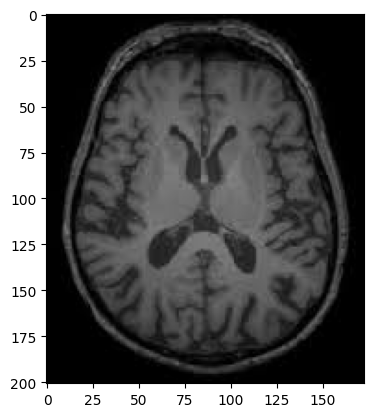

In [11]:
#Sample image without tumor: 
img = mping.imread('C:/Users/Sande/OneDrive/Desktop/CS_Projects/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/10 no.jpg')
imgplot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

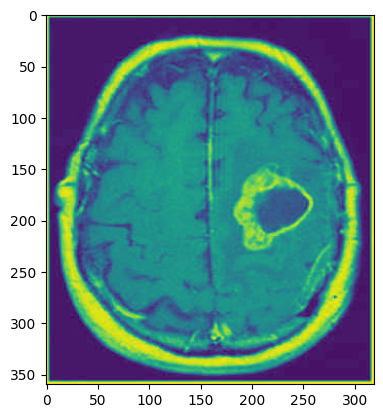

In [15]:
#Sample image with tumor: 
img = mping.imread('C:/Users/Sande/OneDrive/Desktop/CS_Projects/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y10.jpg')
imgplot = plt.imshow(img)
plt.show

Image Pre-processing

In [44]:
#Resize image then convert to numpy arrays
from PIL import Image  # Import Image module from PIL or Pillow
from PIL import ImageEnhance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


negative_tumor_path = 'C:/Users/Sande/OneDrive/Desktop/CS_Projects/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/'
positive_tumor_path = 'C:/Users/Sande/OneDrive/Desktop/CS_Projects/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/'

vals = []

factor = 1.5

for i in no_tumor: 
    image_path = negative_tumor_path + i
    image = Image.open(image_path)
    image_gray = image.convert('L')
    image_resized = image_gray.resize((300, 300))
    enhancer = ImageEnhance.Contrast(image_resized)
    contrast_enhanced = enhancer.enhance(factor)
    image_array = np.array(contrast_enhanced)
    vals.append(image_array)

for i in yes_tumor:
    image_path = positive_tumor_path + i
    image = Image.open(image_path)
    image_gray = image.convert('L')
    image_resized = image_gray.resize((300, 300))
    enhancer = ImageEnhance.Contrast(image_resized)
    contrast_enhanced = enhancer.enhance(factor)
    image_array = np.array(contrast_enhanced)
    vals.append(image_array)


print(vals)
X = np.array(vals)
y = np.array(total_labels)

X = X.reshape(-1, 300, 300, 1)

print(X.shape)
print(y.shape)


#splits data into train/val(.90) and test(.10)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size= .10, random_state= 24)

#splits train/val(.90) into train(.90) and val(.10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= .10, random_state= 24)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0

Train/Validation/Test Split 


In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augment_images = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.3, width_shift_range = 0.2, height_shift_range= 0.2, fill_mode = "nearest")

train_generator = augment_images.flow(X_train, y_train, batch_size= 32)

val_generator = augment_images.flow(X_val, y_val, batch_size= 16)




   
